<a href="https://colab.research.google.com/github/tejabalu/udub/blob/master/Copy_of_lab2_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB2: DATA VISUALIZATION & PROCESSING IN PYTHON
In this lab you will practice Python data processing and visualization.


## Step 1: Access the datasets

In order to streamline grading, we ask that for this and future labs you access your datasets in public urls (urls that exist outside of your session). This allows us to run your code as-is without acquiring login credentials and/or creating local directories 😊

You can access the files for `lab-2` at the following urls:
* Robot faces data set: [robot_faces.csv](https://drive.google.com/open?id=1ggPzwghwNCMz1S5sXlBBmjPUGlqYgI3L)
* Pre-recorded accelerometer data: [accelerometer.csv](https://drive.google.com/open?id=11p6UcZX2jiPO6S8qfxL1uY6ATwJATyq6)

and can incorporate them into your code using the following gists:

```
url_faces = "https://gist.githubusercontent.com/wesleybeckner/70ae15d4143fc01d905c51011ab9c697/raw/6b6ee4ed348f00aee31b4862df8b06bc1b314692/robot_faces.csv"
url_accel = "https://gist.githubusercontent.com/wesleybeckner/a74dacd12b8087c4fc6ab5acc7acf032/raw/480ab2f648036ca562763f42ad68bd0f0db7760e/accelerometer.csv"
```

In [ ]:
## SAMPLE CODE
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
pd.options.display.max_rows = 999
pd.set_option('display.max_colwidth', None)
sns.set()

url = "https://gist.githubusercontent.com/wesleybeckner/70ae15d4143fc01d905c51011ab9c697/raw/6b6ee4ed348f00aee31b4862df8b06bc1b314692/robot_faces.csv"
url2 = "https://gist.githubusercontent.com/wesleybeckner/a74dacd12b8087c4fc6ab5acc7acf032/raw/480ab2f648036ca562763f42ad68bd0f0db7760e/accelerometer.csv"
faces = pd.read_csv(url)
accel = pd.read_csv(url2, header = None)
accel.set_index(0, inplace=True)

faces['year'] = pd.to_numeric(faces['year'], errors='coerce')

## Step 2: Robot face data exploration

We started exploring the data in `robot_faces.csv` during class. As a first exercise you will continue this exploration. First, write the code for loading and preprocessing the data like we did in class. After inspecting the different column names to better understand what the data includes, pose a specific question and write new code to answer that question. Some example questions are:
* How many robots both have a mouth and a nose?
* Which country has the highest fraction of robots with black face color?
* Do more robots built after 2012 have blue eyes than those built before?

Your code should print the question at the beginning and print the computed answer at the end. Your script should also create at least one visualization that allows a human to answer the same question without having to do calculations.

*If you are interested, you can read more about the face data [here](https://spectrum.ieee.org/automaton/robotics/humanoids/what-people-see-in-157-robot-faces).* 


How many of the robots have both mouth and a nose?
28


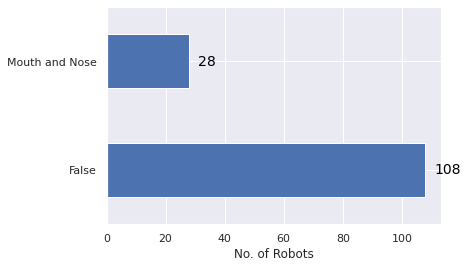

In [ ]:
## TODO: Write code to ask a question about the face data and answer it both visually and programmatically

# Mouth and Nose
faces[['mouth','nose']]
faces['mn'] = faces['mouth']+faces['nose']
faces['mny'] = faces['mn'].apply(lambda x: True if x == 'yy' else False)

fig, ax = plt.subplots()
faces['mny'].value_counts().plot(kind='barh')
ax.set_yticklabels(['False', 'Mouth and Nose'])
ax.set_ylabel('')
ax.set_xlabel('No. of Robots')

for i, v in enumerate(faces['mny'].value_counts()):
    ax.text(v+3, i, str(v), color='black', fontweight='normal', fontsize=14, ha='left', va='center')

print('How many of the robots have both mouth and a nose?')
a = faces['mny'].value_counts()[True]
print(a)


In [ ]:
#Country with highest fraction of black face color

facescolor = faces.groupby('country/region of origin').apply(lambda x: x['face color']=='black').reset_index()
facescolor = facescolor.drop('level_1', axis=1)
facesfreq = facescolor['face color'].groupby(facescolor['country/region of origin'])

facesfreqtable = pd.DataFrame([facesfreq.sum(), facesfreq.count(), facesfreq.sum()/facesfreq.count()], index=('sum', 'count', 'fraction'))
facesfreqtable = facesfreqtable.T.reset_index()
facesfreqtable = facesfreqtable.loc[facesfreqtable['fraction']>0.1]

In [ ]:
facesfreqtable = facesfreqtable.sort_values(by=['fraction']).reset_index()
facesfreqtable = facesfreqtable.set_index('country/region of origin')
a = facesfreqtable['fraction'][facesfreqtable['fraction']==facesfreqtable['fraction'].max()]

Which country has the highest fraction of robots with black face color?
['Canada' 'China']
These are the countries having highest fraction of movies with robots with black face colors.


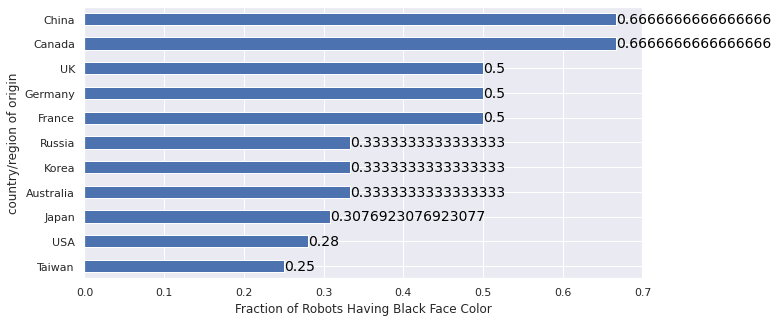

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
facesfreqtable['fraction'].plot(kind = 'barh')


for i, v in enumerate(facesfreqtable['fraction']):
    ax.text(v, i, str(v), color='black', fontweight='normal', fontsize=14, ha='left', va='center')


ax.set_xlabel('Fraction of Robots Having Black Face Color')

print('Which country has the highest fraction of robots with black face color?')
print(a.index.values)
print('These are the countries having highest fraction of movies with robots with black face colors.')

In [ ]:
# Do more robots built after 2012 have blue eyes than those built before?
facesbefore = faces.loc[faces['year']<2012]
facesafter = faces.loc[faces['year']>=2012]

before = facesbefore.loc[facesbefore['eye color']=='blue'].count()
after = facesafter.loc[facesafter['eye color']=='blue'].count()

Do more robots built after 2012 have blue eyes than those built before?
Yes. The count is 21.


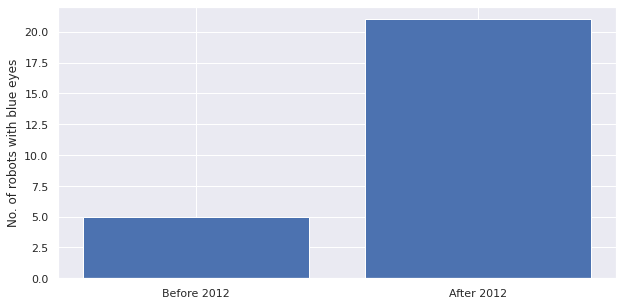

In [ ]:
xaxis = ['Before 2012', 'After 2012']
y = [before[1], after[1]]
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(xaxis, y)

plt.ylabel('No. of robots with blue eyes')
print('Do more robots built after 2012 have blue eyes than those built before?')
if after[1]>before[1]:
  print('Yes. The count is ' + str(after[1]) + '.')
else:
  print('No')

## Step 3: Load and visualize accelerometer data

Next you will explore the accelerometer data in `accelerometer.csv` recorded from a mobile device. 

The first thing your Python script should do is open the data file and parse its content into Python lists or arrays. Each row in the data file corresponds to one reading. The first value is the time in seconds, and the next three values are the x, y, z acceleration values from a mobile device accelerometer. Your goal for this part of the lab is to obtain four lists or arrays (of same length) each containing the different columns in the data file.

You can use the pd.read_csv() that was demonstrated in class, but if you would like to practice string operations from last week, you can open the file, read its content into a single string, and then use the split() function to split into lines (`data_string.split("\n")`) and elements (`data_string.split(",")`).

Before starting to process the data, visualize it to get a better sense of what is in the data. Keep visualization steps in your script for your lab submission.

In [ ]:
## TODO: Code for loading and visualizing accelerometer data
accelnp = accel.to_numpy()

In [ ]:
accelnp1 = accelnp.T

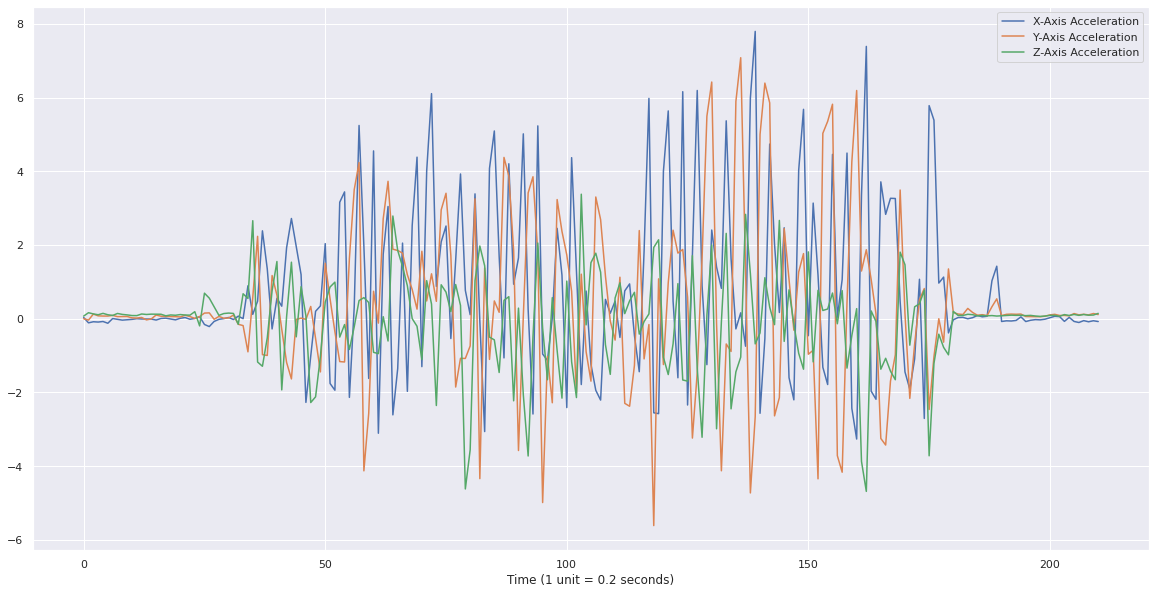

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(accelnp)
plt.legend(('X-Axis Acceleration','Y-Axis Acceleration','Z-Axis Acceleration'))
ax.set_xlabel('Time (1 unit = 0.2 seconds)')
plt.show()

## Step 4: Detecting lack of movement

As a first data processing exercise, iterate over the lists or arrays you created to compute the (i) total amount of time and (ii) percentage of time during which the person holding the mobile device was not moving (e.g., absolute acceleration smaller than ~0.2m/sec^2). Visualize parts of the data where lack of movement is detected together with the original data to verify that it works correctly.

42.2 Seconds of total time.


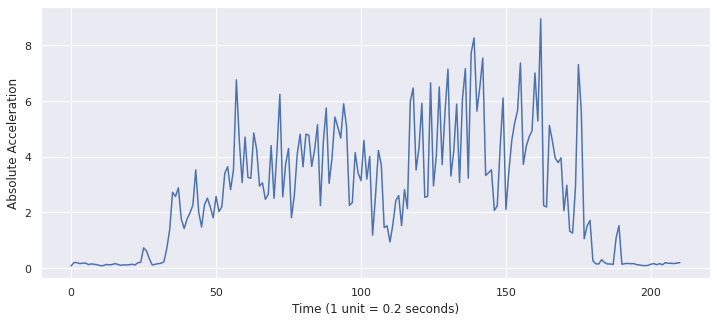

In [ ]:
## TODO: Code for detecting lack of movement (will be run after running code from Step 3)
absacc = np.sqrt(accelnp1[0]**2+accelnp1[1]**2+accelnp1[2]**2)

total_time = (absacc.shape[0])*0.2
print(str(total_time)+ ' Seconds of total time.')

fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(absacc)
ax.set_ylabel('Absolute Acceleration')
ax.set_xlabel('Time (1 unit = 0.2 seconds)')
plt.show()

In [ ]:
notmoving = []

for element in absacc:
  if element < 0.2:
    notmoving.append(True)
  else:
    notmoving.append(False)

How long was the person stationary for?
10.600000000000001 seconds.

What is the percentage of the person being stationary compared to the total time?
25.118483412322277 percentage.

The person is stationary when the value on the blue line is 1.



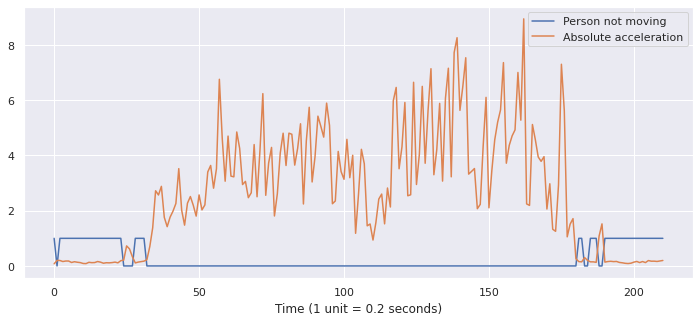

In [ ]:
print('How long was the person stationary for?')
print(str(sum(notmoving)*0.2) + ' seconds.')
print('')
print('What is the percentage of the person being stationary compared to the total time?')
print(str(((sum(notmoving)*0.2)/((absacc.shape[0])*0.2))*100) + ' percentage.')
print('')
print('The person is stationary when the value on the blue line is 1.')
print('')

fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(notmoving)
plt.plot(absacc)
plt.legend(('Person not moving','Absolute acceleration'))
ax.set_xlabel('Time (1 unit = 0.2 seconds)')
plt.show()

## Step 5: Counting steps

Next you will iterate over the data to count how many steps were taken. There are alternative ways to do that but here we will outline an approximation of the "zero-crossing" method. Walking with an accelerometer results in cyclic patterns characterized by pairs of peaks and valleys in acceleration in some directions. In the provided data you can focus on the z dimension, since the mobile device was held in fixed orientation. To determine the peaks and valleys, iterate over the z values; compare each element in the list to the value of the previous and the next element (note that you cannot do this for the first and last elements of the list); if it is greater than or smaller than both of those, it corresponds to a peak or a valley. Create a separate list, of same length as the data lists, that has the value +1 where peaks occur, -1 where valleys occur, and 0 otherwise. Visualize the peaks and the valleys on the same plot as your data to verify that your algorithm works correctly.

You will see that even very small variations in acceleration cause peaks and valleys, so we need to be stricter in detecting peaks and valleys that correspond to an actual step. For that, you can extend the condition for peaks and valleys to include a threshold on the absolute value (math.fabs()) of the acceleration in the z direction (e.g., ~1m/sec^2). Visually inspect the number of peaks and valleys with this stricter criteria. 

A rough approximation of the number of steps would be the math.min() of the numbers of peaks and number of valleys. If you are out of time for this lab, you can stop here. However, to count pairs of peaks and valleys more strictly, you need to iterate over the list of peaks and valleys to determine the number of times a peak is followed by a valley (or vice versa) within one second or so (i.e., -1 and 1 separated by no more than four 0s in the peak/valley list). So if you have time, implement counting of pairs as a more accurate approximation of the number of steps. 

Your script should print the counted number of steps on the terminal at the end.

In [ ]:
## TODO: Code for counting steps in accelerometer data (will be run after Step 4)

zacc = accelnp1[2].tolist()
peaksnvalleys = []
peaksnvalleys.append(0)

for i in range(1, (len(zacc)-1)):
  if (zacc[i-1]<zacc[i]) and (zacc[i]>zacc[i+1]):
    peaksnvalleys.append(1)
  elif (zacc[i-1]>zacc[i]) and (zacc[i]<zacc[i+1]):
    peaksnvalleys.append(-1)
  else:
    peaksnvalleys.append(0)
peaksnvalleys.append(0)

Peaks and valleys before setting the threshold on acceleration.


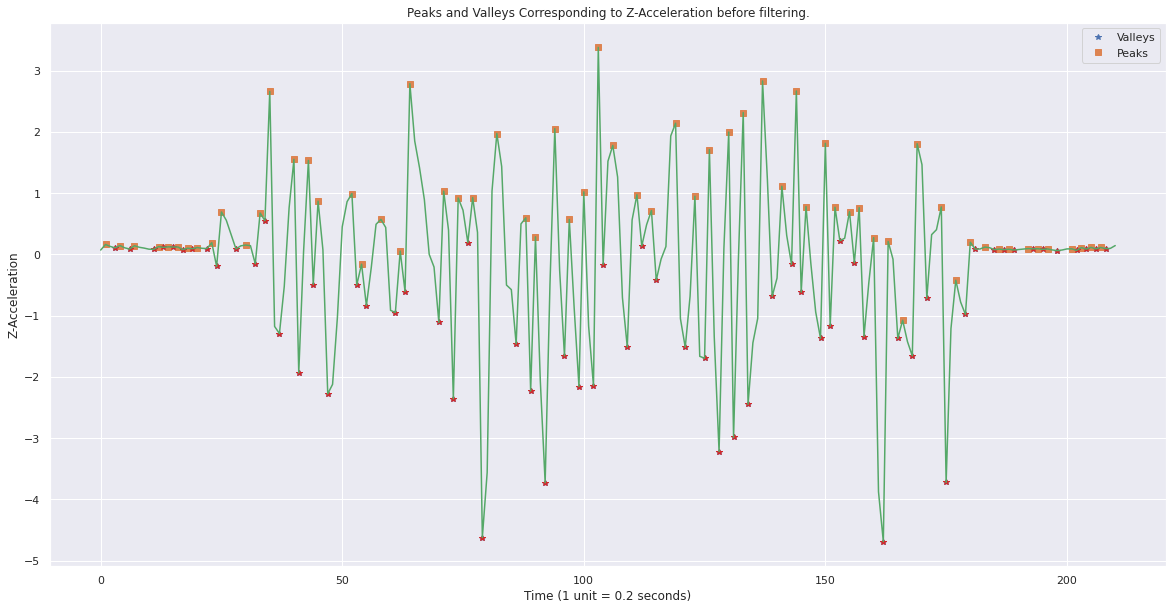

In [ ]:
peaksnvalleys = np.asarray(peaksnvalleys)
peaksnvalleysp = np.absolute(peaksnvalleys)
zacc = np.asarray(zacc)
zaccpv = zacc*peaksnvalleysp
zaccpv[zaccpv==0] = np.nan

print('Peaks and valleys before setting the threshold on acceleration.')

fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(zaccpv, '*')
ax.plot(np.argwhere((peaksnvalleys > 0)), zaccpv[peaksnvalleys > 0], ls='', marker='s')
ax.plot(np.argwhere(~(peaksnvalleys > 0)), zaccpv[~(peaksnvalleys > 0)], ls='', marker='*', c='tab:red')
ax.set_title('Peaks and Valleys Corresponding to Z-Acceleration before filtering.')
ax.set_xlabel('Time (1 unit = 0.2 seconds)')
ax.set_ylabel('Z-Acceleration')
plt.legend(('Valleys','Peaks'))
plt.plot(zacc)
plt.show()

In [ ]:
threshold = []
abs(zacc[78])
k=0

abszacc = np.absolute(zacc)

for i in range(0,211):
  if abszacc[i] > 1:
    threshold.append(1)
  else:
    threshold.append(0)

threshold = np.asarray(threshold)
zaccpvt = zaccpv*threshold
peaksnvalleys = peaksnvalleys*threshold
zaccpvt[zaccpvt==0] = np.nan

How many steps are taken by the person?
22 steps.


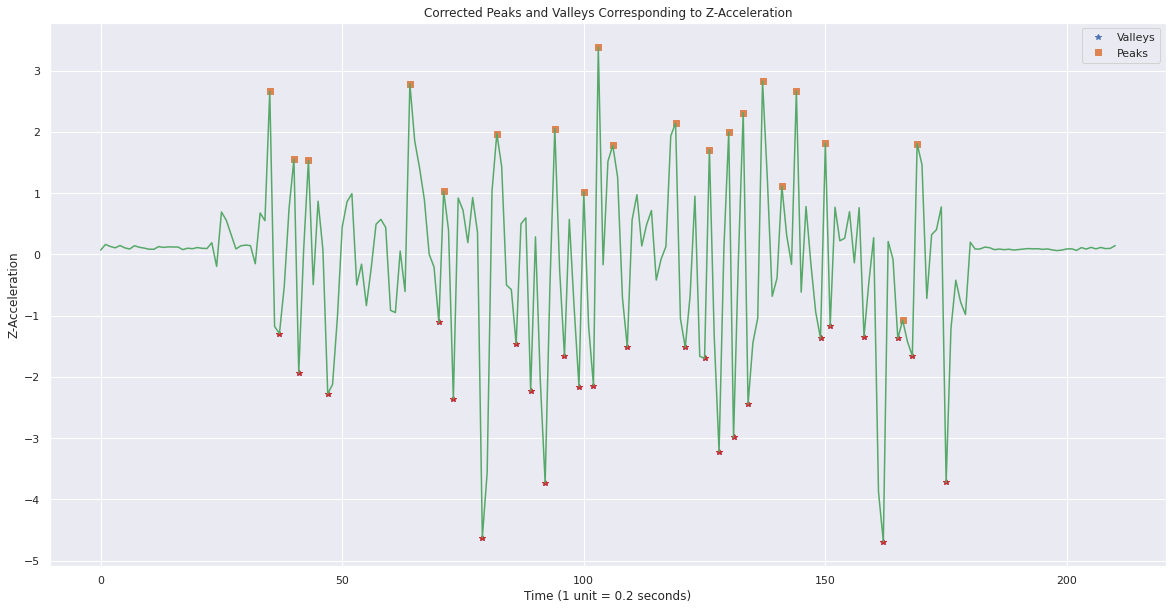

In [ ]:
print('How many steps are taken by the person?')
print(str(round(np.sum(np.absolute(peaksnvalleys))/2)) + ' steps.')

fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(zaccpvt, '*')
ax.plot(np.argwhere((peaksnvalleys > 0)), zaccpvt[peaksnvalleys > 0], ls='', marker='s')
ax.plot(np.argwhere(~(peaksnvalleys > 0)), zaccpvt[~(peaksnvalleys > 0)], ls='', marker='*', c='tab:red')
ax.set_title('Corrected Peaks and Valleys Corresponding to Z-Acceleration')
ax.set_xlabel('Time (1 unit = 0.2 seconds)')
ax.set_ylabel('Z-Acceleration')
plt.legend(('Valleys','Peaks'))
plt.plot(zacc)
plt.show()

## Optional

If you have extra time on this lab, go over your code and add error checks for things that might go wrong, such as if the data file does not have the expected format or if an operation returns empty lists. Instead of throwing errors in these situations, your script should print informative error messages. In addition, you can go over your code to refactor it into potentially re-usable functions. Finally, you can use the ipywidgets we covered in class to make your figures interactive. Do this part on the code above and list all the improments you made in the text here.

Improvements:
  *Used Seaborn to plot the graphs

How many steps are taken by the person?
22 steps.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


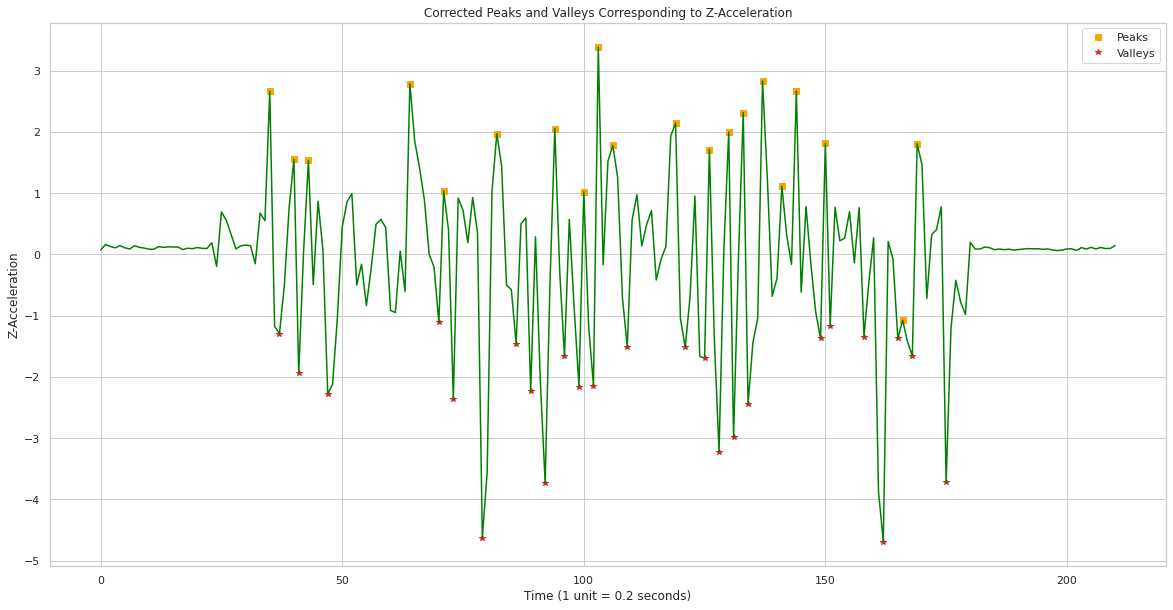

In [ ]:
print('How many steps are taken by the person?')
print(str(round(np.sum(np.absolute(peaksnvalleys))/2)) + ' steps.')

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(zaccpvt)
ax.plot(np.argwhere((peaksnvalleys > 0)), zaccpvt[peaksnvalleys > 0], ls='', marker='s', c='orange')
ax.plot(np.argwhere(~(peaksnvalleys > 0)), zaccpvt[~(peaksnvalleys > 0)], ls='', marker='*', c='tab:red')
ax.set_title('Corrected Peaks and Valleys Corresponding to Z-Acceleration')
ax.set_xlabel('Time (1 unit = 0.2 seconds)')
ax.set_ylabel('Z-Acceleration')
plt.legend(('Peaks','Valleys'))
plt.plot(zacc, color='green')

## Step 6: Submit your code on Canvas

Complete this lab by submitting a link to your this file (`lab2.ipynb`) on Canvas, by Oct 8 Tuesday, 11:59pm. We will test your code by manually running them and inspecting the code to verify that:
* Your face data analysis prints out a clearly stated question and the answer to the question onto the terminal. The code for computing the answer correctly represents the intended question. It also creates an interpretable visualization of parts of the data that would allow a person to answer the same question.
* Your step counter code visualizes the accelerometer data, clearly showing times where there is no movement and where peaks and valleys are detected by your algorithm. It prints the detected number of steps on the terminal at the end. The detected number is reasonable compared to ground truth and the code corresponds to the described algorithm.

See Canvas for a grading rubric.